In [1]:
library(DBI)

In [47]:
mydb <- dbConnect(RSQLite::SQLite(), "/shared/projects/form_2022_19/pascal/central_database/sample_collab.db")
df <- dbGetQuery(mydb, 'SELECT JobName,CPUTimeRAW,MaxRSS,MaxVMSize,read_count,base_count, patient_code, host_disease_status, nuc from blastn_viral_resources_used cpu inner join sample_annot spl on cpu.JobName=spl.run_accession;')
#JobName,CPUTimeRAW,MaxRSS,MaxVMSize from blastn_viral_resources_used cpu, read_count,base_count from sample_annot database

In [48]:
df[df$JobName =='ERR6913300',] # check if my patient id has successfully added to the database shared

,JobName,CPUTimeRAW,MaxRSS,MaxVMSize,read_count,base_count,patient_code,host_disease_status,nuc
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>
134,ERR6913300,392,500400K,1129464K,1700124,214358045,P356,SARS-CoV-2 positive,DNA


In [60]:
library(ggplot2)

In [49]:
colnames(df)

[1] "JobName"             "CPUTimeRAW"          "MaxRSS"             
[4] "MaxVMSize"           "read_count"          "base_count"         
[7] "patient_code"        "host_disease_status" "nuc"

In [53]:
df$minutes <- as.integer(as.character(df$CPUTimeRAW)) / 60
df$read_M <- df$read_count / 1000000

In [55]:
df$ram_M <- as.numeric(sub('K$','',df$MaxRSS, perl =TRUE))/1000

In [56]:
df$pat <- as.factor(df$patient_code)

In [57]:
head(df, 10)

,JobName,CPUTimeRAW,MaxRSS,MaxVMSize,read_count,base_count,patient_code,host_disease_status,nuc,minutes,read_M,ram_M,pat
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>
1,ERR6913101,564,189792K,1980292K,658268,80692720,P4,SARS-CoV-2 positive,DNA,9.4,0.658268,189.792,P4
2,ERR6913102,108,1244K,352620K,102524,13193813,P11,SARS-CoV-2 positive,DNA,1.8,0.102524,1.244,P11
3,ERR6913103,300,1236K,352620K,385740,49060845,P19,SARS-CoV-2 positive,DNA,5.0,0.385740,1.236,P19
4,ERR6913105,336,1244K,352620K,447254,57554921,P35,SARS-CoV-2 positive,DNA,5.6,0.447254,1.244,P35
5,ERR6913106,768,401380K,1971016K,1271618,168661241,P55,SARS-CoV-2 positive,DNA,12.8,1.271618,401.380,P55
6,ERR6913107,60,1152K,352492K,190648,24785538,P66,SARS-CoV-2 positive,DNA,1.0,0.190648,1.152,P66
7,ERR6913108,216,1232K,352620K,226280,29240147,P69,SARS-CoV-2 positive,DNA,3.6,0.226280,1.232,P69
8,ERR6913111,60,1168K,352492K,33240,4397612,P90,SARS-CoV-2 positive,DNA,1.0,0.033240,1.168,P90
9,ERR6913112,48,1240K,352628K,63444,8094624,P259,SARS-CoV-2 positive,DNA,0.8,0.063444,1.240,P259


In [ ]:
ggplot(df, aes(x=read_count, y=base_count)) + geom_point() + geom_smooth (method='lm', formula=y ~x) +theme_bw()

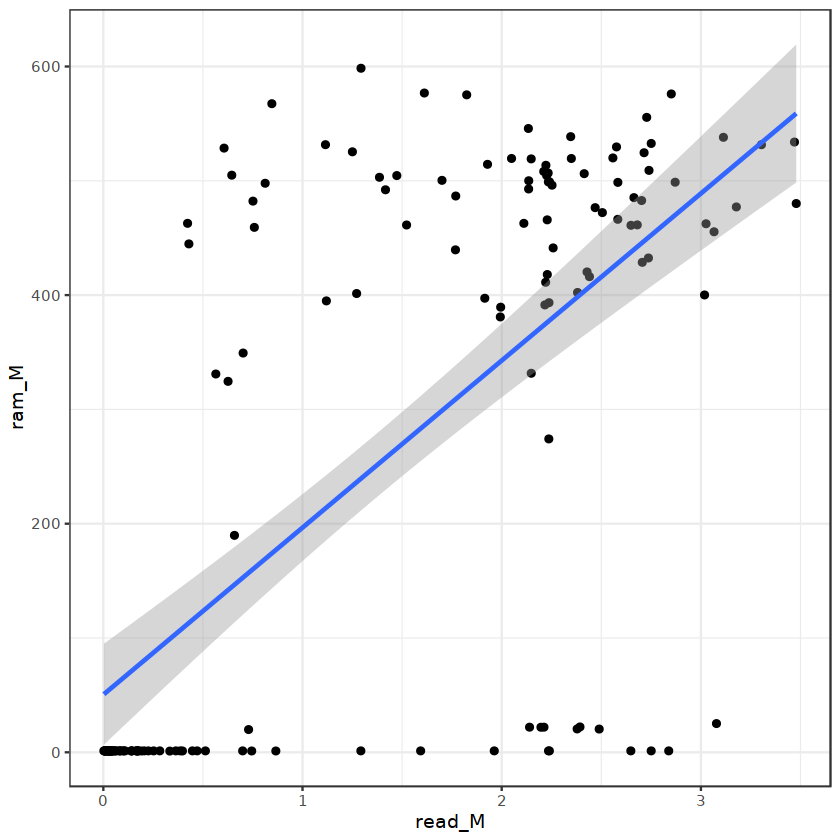

In [64]:
ggplot(df, aes(x=read_M, y=ram_M)) + geom_point() + geom_smooth (method='lm', formula=y ~x) +theme_bw()

In [69]:
df.lm <- lm(minutes ~ read_M, df)
df.lm


Call:
lm(formula = minutes ~ read_M, data = df)

Coefficients:
(Intercept)       read_M  
    -0.3949       8.0503  


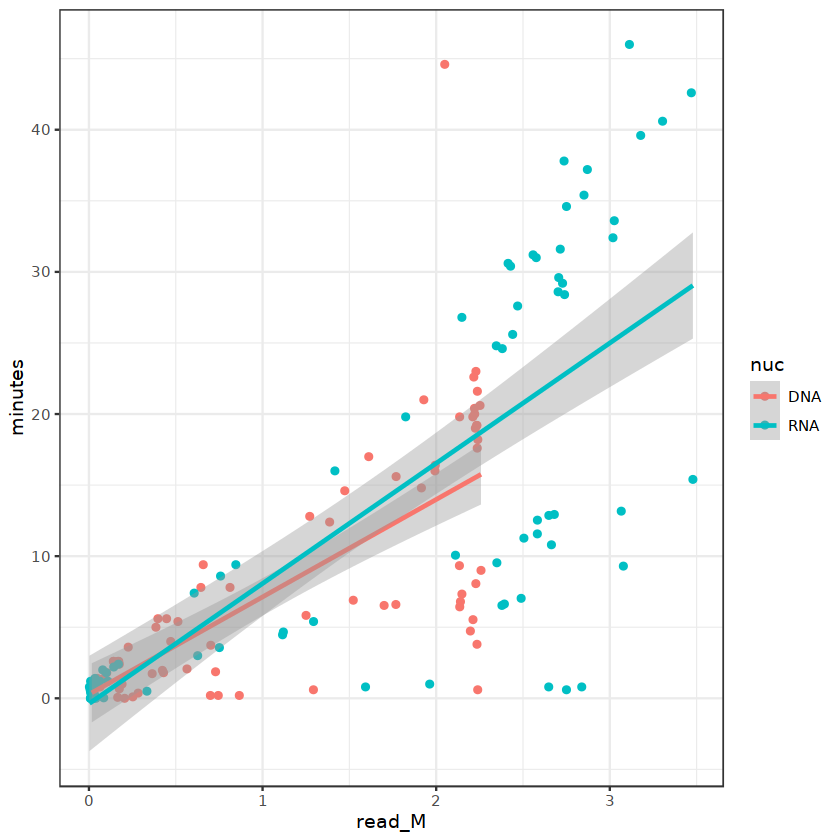

In [65]:
ggplot(df, aes(x=read_M, y=minutes, color =nuc)) + geom_point() + geom_smooth (method='lm', formula=y ~x) +theme_bw()

5000 M given to process , 10 cpu min/M ( the speed of one cpu to process 1M reads)
(5000 *10)/100 = 500 min  ( to request 10 CPUs)

blast, breank the sequence, find and expand the alignment... if the alignment did not go very far, throw into a bin,
if the alignment goes well, it will expand, and gives to your results.

k-mer, a subsequence of length k, cut your query into k-mer.. difficulties: mismatch/mutation.. indels.
k-mer assumes no existence of mismatch/mutation and indels, the shorter k-mer, the longer it takes. The longer k-mer, less sensitive 

Refseq



Afternoon session  bracken_abundances_long